## 

In [15]:
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader
from torch import optim
from torch import nn

## Data preparation

Fot this model I am using MNIST dataset.
[MNIST](https://medium.com/mlearning-ai/mnist-dataset-of-handwritten-digits-f8cf28edafe#:~:text=MNIST%20is%20a%20widely%20used,standard%20benchmark%20for%20classification%20tasks.) is a widely used dataset of handwritten digits that contains 60,000 handwritten digits for training a machine learning model and 10,000 handwritten digits for testing the model. It was introduced in 1998 and has become a standard benchmark for classification tasks.

In [16]:
train_dataset = MNIST(
            root='data',
            download=True,
            train=True,
            transform=transforms.ToTensor()
    )
test_dataset = MNIST(
            root='data',
            download=True,
            train=False,
            transform=transforms.ToTensor()
    )


batch_size = 64
train_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=batch_size,shuffle=True)

## Model and Train/Test

In [17]:
from CustomNN import ImageNN,train_nn,test_nn

In [18]:
model = ImageNN()
optimizer = optim.SGD(model.parameters(),lr=0.05)
device = ('cuda' if torch.cuda.is_available() else 'cpu')
loss_function = nn.CrossEntropyLoss()

In [19]:
model

ImageNN(
  (linear1): Linear(in_features=784, out_features=512, bias=True)
  (act1): ReLU()
  (linear2): Linear(in_features=512, out_features=256, bias=True)
  (act2): ReLU()
  (linear3): Linear(in_features=256, out_features=256, bias=True)
  (act3): ReLU()
  (linear4): Linear(in_features=256, out_features=128, bias=True)
  (act4): ReLU()
  (linear5): Linear(in_features=128, out_features=10, bias=True)
)

This model has 4 hidden layers with __ReLU__ activation function, the the output layer with __Softmax__ activation function. To train this model I using __Stochastic Gradient Descent__ as optimizer (lr = 0.05) and __Cross Entropy__ as loss function.

In [20]:
for epoch in range(1,30):
    train_nn(device,model,train_loader,optimizer,loss_function,epoch)
    test_nn(device,model,test_loader,loss_function)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.296060
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.193518
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.768403
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1.761437
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.638776
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.734705
Train Epoch: 1 [38400/60000 (64%)]	Loss: 1.600565
Train Epoch: 1 [44800/60000 (75%)]	Loss: 1.613058
Train Epoch: 1 [51200/60000 (85%)]	Loss: 1.565674
Train Epoch: 1 [57600/60000 (96%)]	Loss: 1.585642

Test Accuracy: 90.40%
Test loss: 246.78860473632812

Train Epoch: 2 [0/60000 (0%)]	Loss: 1.611210
Train Epoch: 2 [6400/60000 (11%)]	Loss: 1.540979
Train Epoch: 2 [12800/60000 (21%)]	Loss: 1.565675
Train Epoch: 2 [19200/60000 (32%)]	Loss: 1.510157
Train Epoch: 2 [25600/60000 (43%)]	Loss: 1.569825
Train Epoch: 2 [32000/60000 (53%)]	Loss: 1.512448
Train Epoch: 2 [38400/60000 (64%)]	Loss: 1.517505
Train Epoch: 2 [44800/60000 (75%)]	Loss: 1.563524
Train Epoch: 2 [51200/60000 (85%)]	Loss: 1.550582
Train Ep


Test Accuracy: 97.18%
Test loss: 233.94400894641876

Train Epoch: 16 [0/60000 (0%)]	Loss: 1.478038
Train Epoch: 16 [6400/60000 (11%)]	Loss: 1.492537
Train Epoch: 16 [12800/60000 (21%)]	Loss: 1.465078
Train Epoch: 16 [19200/60000 (32%)]	Loss: 1.505275
Train Epoch: 16 [25600/60000 (43%)]	Loss: 1.466453
Train Epoch: 16 [32000/60000 (53%)]	Loss: 1.483527
Train Epoch: 16 [38400/60000 (64%)]	Loss: 1.464886
Train Epoch: 16 [44800/60000 (75%)]	Loss: 1.480898
Train Epoch: 16 [51200/60000 (85%)]	Loss: 1.463474
Train Epoch: 16 [57600/60000 (96%)]	Loss: 1.492825

Test Accuracy: 96.63%
Test loss: 234.87666261196136

Train Epoch: 17 [0/60000 (0%)]	Loss: 1.469619
Train Epoch: 17 [6400/60000 (11%)]	Loss: 1.501104
Train Epoch: 17 [12800/60000 (21%)]	Loss: 1.461664
Train Epoch: 17 [19200/60000 (32%)]	Loss: 1.462486
Train Epoch: 17 [25600/60000 (43%)]	Loss: 1.476848
Train Epoch: 17 [32000/60000 (53%)]	Loss: 1.478180
Train Epoch: 17 [38400/60000 (64%)]	Loss: 1.478354
Train Epoch: 17 [44800/60000 (75%)]	L

After 30 epoch training model reach 97.8% percent accuracy.

In [21]:
torch.save(model.state_dict(),"model_1.pth")

##  Recognize digits based on handwritten images

The following function will return digit based on handritten images (jpeg,png or other forma PIL.Image can open). Also you can try it youself by following this link.

In [22]:
# transform image into torch.tensor 

transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((28, 28)),
    transforms.ToTensor()
])

In [35]:
def predicted_digit(image,model=model):
    
    image = transform(image).to(device)
    
    output = model(image)
    _,label = torch.max(output.data,1)
    
    return label.item()
    

In [45]:
# from PIL import Image module to open images 
from PIL import Image
import glob

In [48]:
path = "Images/"
path = glob.glob(path)

In [49]:
for image in path:
    print(image)

Images/


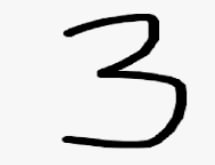

In [42]:
img

Model performance is not good, predected value for random selected digit is not what actually it is.